# Homework 2 Regression Refresher

In class, we considered a very simply algorithm called gradient descent that we used to estimate the parameters of a simple linear model. But we left many considerations open. These include:
- Normalization 
    - We saw that the SSE is a very big number in our example, leading us to choose awkwardly small learning rates. Normaling the error may help us use more reasonably sized learning rates.
- When to stop
    - We can tell the algorithm to stop after a set number of iterations or, something smarter, tell it to stop when it begins to take very small step sizes
- Multiple solutions
    - It should be obvious that gradient descent, as an algorithm, doesn't do much "thinking". 
    - If there are multiple solutions, it will only find one
        

## Problem 1 - Use gradient descent to identify multiple minima

Regression algorithms ultimately search for minima. This can be where an error function is minimized (as we saw in class) or when a polynomial equation is minimized. Using the code from our lecture, adapt the code in order to indentify the roots of the following equation: 

$x^3 - 6x^2 +11x = 6$
  
- Look at homework 1 for how to tackle this problem.
- Since the polynomial will have more than 1 solution, be sure to consider multiple starting guesses. 
- Use the "roots" function from numpy to check your answer. Roots is especially designed for polynomials and should find all roots.

Our best value for our slope is  0.993257093846277  with SSE 0.00018557303033228008


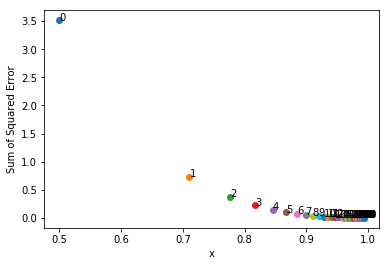

In [8]:
import numpy as np;
import math
import matplotlib.pyplot as plt
def SSE(x):
    y = x**3 - (6*x**2) + (11*x) - 6
    err = y**2
    return err;

def derivative(x):
    DERIVATIVE = (SSE(x+0.01)-SSE(x))/0.01;
    return DERIVATIVE

derivative(.4)

n = 0;
current_x = .5;
rate = 0.01; # Try raising in very small increments, from 0.000001 to 0.00001

# Plot our initial guess' SSE and label zero
plt.plot(current_x, SSE(current_x),'o');
plt.text(current_x, SSE(current_x),n);

while n < 50:
    new_x = current_x - rate * derivative(current_x);
    current_x=new_x;
    
    n = n + 1;
    plt.plot(new_x, SSE(new_x),'o')
    plt.text(new_x, SSE(new_x),n)
    
print("Our best value for our slope is ", new_x, " with SSE", SSE(new_x));
plt.xlabel("x");
plt.ylabel("Sum of Squared Error");

Our best value for our slope is  1.9949944303300968  with SSE 2.5054472156992358e-05


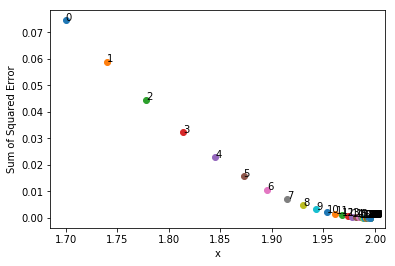

In [2]:
def SSE(x):
    y = x**3 - (6*x**2) + (11*x) - 6
    err = y**2
    return err;

def derivative(x):
    DERIVATIVE = (SSE(x+0.01)-SSE(x))/0.01;
    return DERIVATIVE

derivative(.4)

n = 0;
current_x = 1.7;
rate = 0.1; # Try raising in very small increments, from 0.000001 to 0.00001

# Plot our initial guess' SSE and label zero
plt.plot(current_x, SSE(current_x),'o');
plt.text(current_x, SSE(current_x),n);

while n < 50:
    new_x = current_x - rate * derivative(current_x);
    current_x=new_x;
    
    n = n + 1;
    plt.plot(new_x, SSE(new_x),'o');
    plt.text(new_x, SSE(new_x),n);
    
print("Our best value for our slope is ", new_x, " with SSE", SSE(new_x))
plt.xlabel("x");
plt.ylabel("Sum of Squared Error");

Our best value for our slope is  2.9949624992968515  with SSE 9.99800009998686e-05


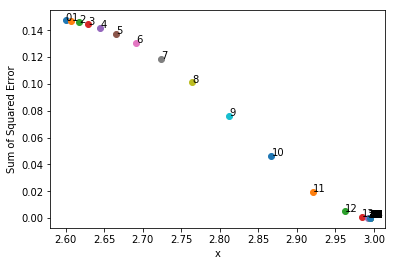

In [3]:
def SSE(x):
    y = x**3 - (6*x**2) + (11*x) - 6
    err = y**2
    return err;

def derivative(x):
    DERIVATIVE = (SSE(x+0.01)-SSE(x))/0.01;
    return DERIVATIVE

derivative(.4)

n = 0;
current_x = 2.6;
rate = 0.1; # Try raising in very small increments, from 0.000001 to 0.00001

# Plot our initial guess' SSE and label zero
plt.plot(current_x, SSE(current_x),'o');
plt.text(current_x, SSE(current_x),n);

while n < 50:
    new_x = current_x - rate * derivative(current_x);
    current_x=new_x;
    
    n = n + 1;
    plt.plot(new_x, SSE(new_x),'o');
    plt.text(new_x, SSE(new_x),n);
    
print("Our best value for our slope is ", new_x, " with SSE", SSE(new_x))
plt.xlabel("x");
plt.ylabel("Sum of Squared Error");

In [4]:
sol_x=np.roots([1, -6,+11,-6])
print(sol_x)

[3. 2. 1.]


## Problem 2 - Linear regression can be used to analyze "groups"

In class, we used linear regression to fit a linear model to height and weight data. In this case, the measurements (x) and the outcomes (y) are continuous. Linear regression is also commonly used to analyze groups, wherein the measurements are not continous. For example, we may have measured the height of persons who did or did not eat asparagus when they were young. In this case, x is discrete - a collection of 1's and 0's. 

Let's use linear regression to analyze the miles per gallon achieved by select type of cars. Download the data from https://gist.github.com/noamross/e5d3e859aa0c794be10b. We want to determine if 8 cylinder vehicles get less gas mileage than 4 and 6 cylinder cars. Cyl = cylinders; MPG = miles per gallon on the table.

### a) Write the code to determine the average MPG for 8 cylinder vehicles vs 4/6 cyl vehicle.
Be sure the mean values are clearly identified or report them in a new markup cell below the code. Be sure that you are treating 4 and 6 cyl vehicles as one group.

In [5]:
#Load CSV files to pandas using read_csv()
import pandas as pd
data= pd.read_csv("cars.csv")

MPG = data.mpg.to_numpy()
CYL=data.cyl.to_numpy()


MPG_avg_8cyl=MPG[CYL==8]
MPG_avg_cyl=MPG[CYL!=8]

print(data.mpg.where(CYL == 8).mean())
print(data.mpg.where(CYL != 8).mean())

print(f'8 Cylinder avg. MPG =  {MPG_avg_8cyl.mean():.1f}')
print(f'4/6 Cylinder avg. MPG =  {MPG_avg_cyl.mean():.1f}')

15.100000000000003
23.97222222222222
8 Cylinder avg. MPG =  15.1
4/6 Cylinder avg. MPG =  24.0


### b) Analyze using linear regression
To analyze with linear regression, we have to create a linear model. Here, our y is the MPG. But x is not a continous variable - it's a group variable. 

- Let's create a "Group" column in our data, where a 1 indicates that a vehicle has a 8 cyl engine and a 0 to indicate a 4 or 6 cylinder vehicle. 
- Use the linear regression **mathematical code** (do not use packages; perform the matrix algrebra) from class to calculate the slope and intercept. Feel free to check your answer using on the packages demonstrated in class.
- Report the slope and intercept in a text box below your code. 
- In the text box, also compare the calculated slope and intercept to the values of the means calculated above. Do you notice any obvious relationships?



In [6]:
data['Group']=np.where(data['cyl']==8,1,0)
x=data['Group'].values
y=data['mpg'].values

In [7]:
X = np.c_[np.ones(len(x)),x]
print(X)

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

INTERCEPT, SLOPE = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "and our slope is", SLOPE)


# Need to make array matrices. This is for when there is NO intercept
X = np.c_[x]
tmp = inv(np.matmul(np.transpose(X),X))

SLOPE = tmp @ np.transpose(X) @ y
print("Our slope when we force the intercept to be zero = ",SLOPE)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]]
Our intercept is  23.972222222222218 and our slope is -8.87222222222222
Our slope when we force the intercept to be zero =  [15.1]


**Previously, from the average of the grouped values, it has been found that there is relationship between slope found from linear regression and average values found from each of the group. When we considered slope with non zero intercept, we have obtained the slope equal to average of 4/6 cylinder vehicles while in the case of zero intercept, we obtained exactly the same value of slope as that of average value of 8 cylinder vehicle.** 

**8 Cylinder avg. MPG =  15.1**

**4/6 Cylinder avg. MPG =  24.0**